---- OUTLINE ----

The purpose of this notebook is to examine and optimize inventory management, increasing profitability. The following list is an outline of how this analysis will be conducted.

1.) Data Preprocessing and Cleaning

2.) Exploratory Data Analysis (EDA)

3.) Feature Engineering

4.) Data Analysis and Modeling

5.) Model Evaluation and Interpretation

6.) Recommendations and Action Plan

7.) Presentation and Visualization

---- 1.) Data Preprocessing and Cleaning ----

In [107]:
# Import libraries needed for Profitability Analysis
import pandas as pd                         
import matplotlib.pyplot as plt
import plotly.express as px

In [108]:
# Use pandas to read the file and read the head
data = pd.read_csv('Sample - Superstore.csv')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


---- Duplicates & Missing Values ----

In [109]:
print(data.isnull().sum())
print("\n")
print("There are",data.isnull().sum().sum(),"Null (missing) values in this data set")
print("There are",data.duplicated().sum(),"Duplicates in this data set")

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


There are 0 Null (missing) values in this data set
There are 0 Duplicates in this data set


---- Irrelevant or Redundant Features ----

Delete columns "Row ID", "Order ID", "Ship Mode", "Customer Name", "Country", "Region" as they hold no relevance towards inventory management analysis.

In [110]:
data = data.drop(["Row ID", "Ship Mode", "Customer Name", "Country", "Region", "Ship Date", "Customer ID"], axis=1)
# Check head to ensure columns were deleted
data.head(3)

,Order ID,Order Date,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,6/12/2016,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


---- Data Formatting and Conversion ----

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Product ID    9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Product Name  9994 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      9994 non-null   int64  
 12  Discount      9994 non-null   float64
 13  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


----

---- 2.) Exploratory Data Analysis (EDA) ----

In [112]:
Explore each column within the data set and use data visualization to display information.

SyntaxError: invalid syntax (335755814.py, line 1)

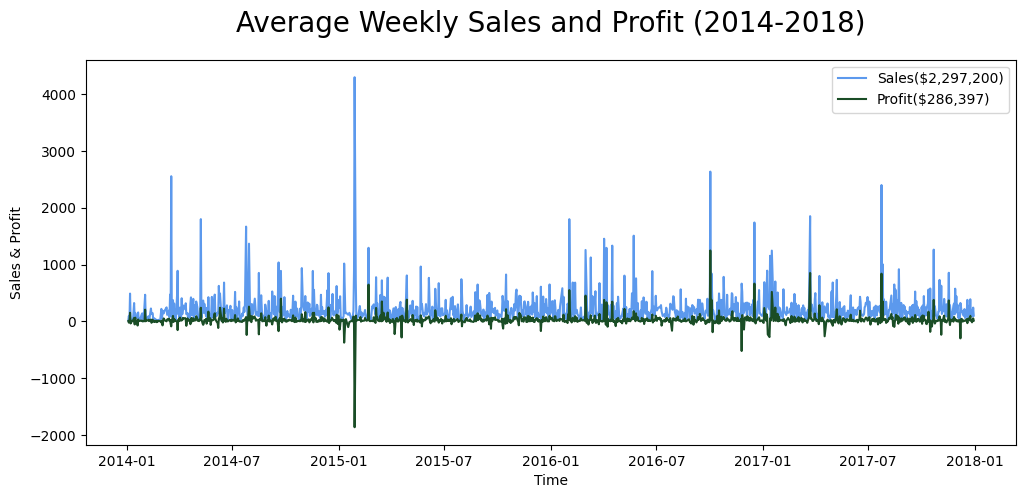

In [ ]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = data[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[12,5])
plt.plot(df_line.index, 'Sales', data=df_line, color='#5c99ed') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#1a4d26') # Avg Profit over Time
plt.title("Average Weekly Sales and Profit (2014-2018)", size=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Sales & Profit')
plt.legend(['Sales($2,297,200)','Profit($286,397)'])

plt.show()

Look at categorical data regarding sales & profit

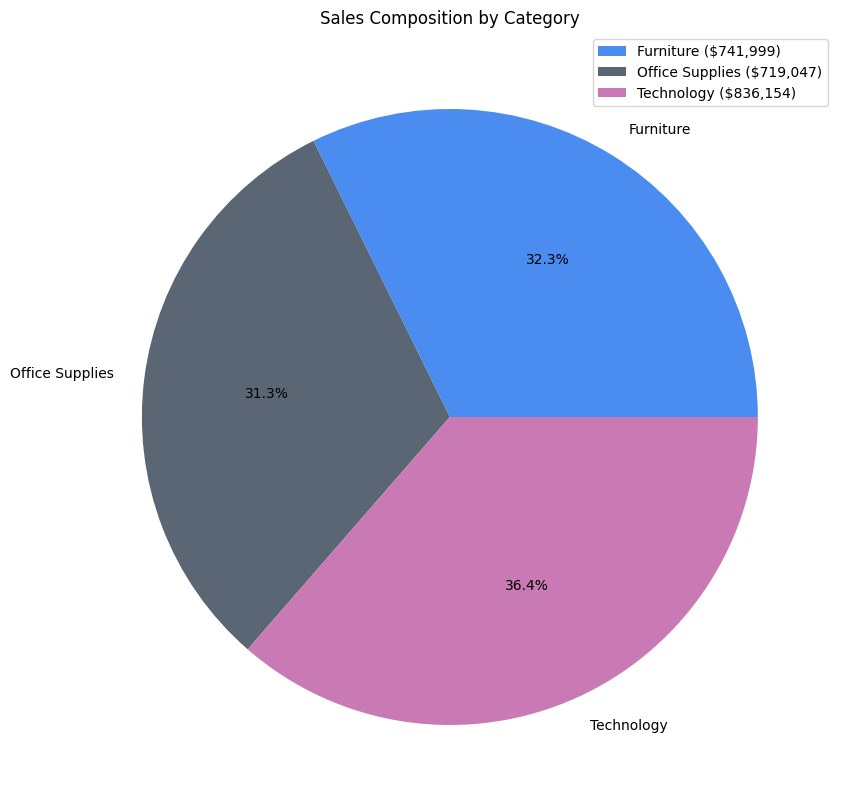

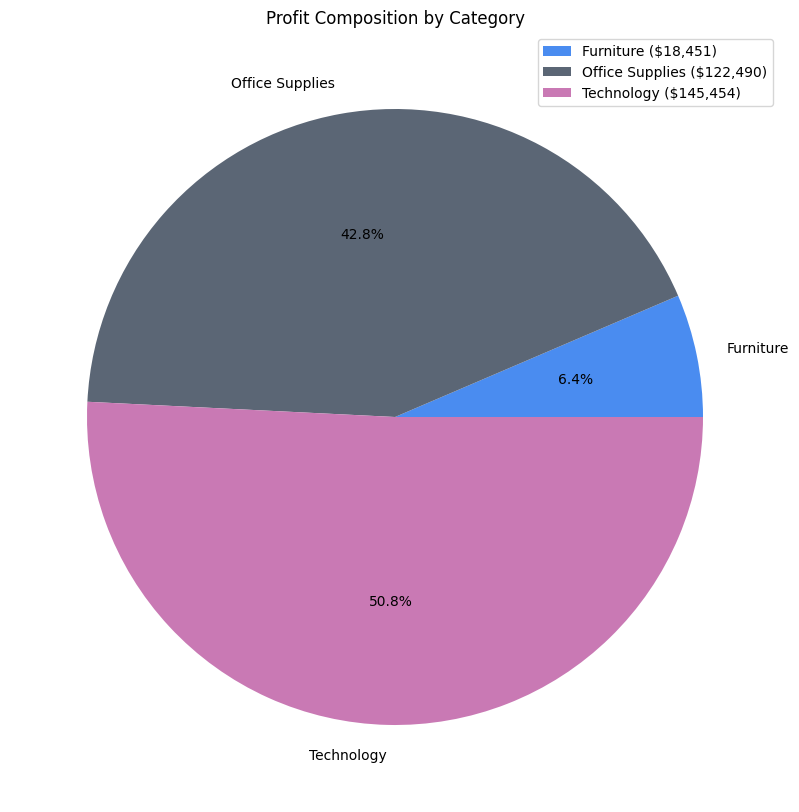

In [ ]:
# Taking a subset of data (To keep things simple)
categorical_data = data[['Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
categorical_data = categorical_data.groupby(['Category']).sum().reset_index()


plt.figure(figsize=[10,10])
plt.pie(categorical_data['Sales'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Sales Composition by Category')
plt.legend(labels=['Furniture ($741,999)','Office Supplies ($719,047)','Technology ($836,154)'])
plt.show()

# Pie chart by categorical profit
plt.figure(figsize=[10,10])
plt.pie(categorical_data['Profit'], autopct='%1.1f%%', labels=categorical_data['Category'], colors=['#4a8cf0','#5b6675','#c979b4'])
plt.title('Profit Composition by Category')
plt.legend(labels=['Furniture ($18,451)','Office Supplies ($122,490)','Technology ($145,454)'])
plt.show()

Now it is time to investigate sub categories

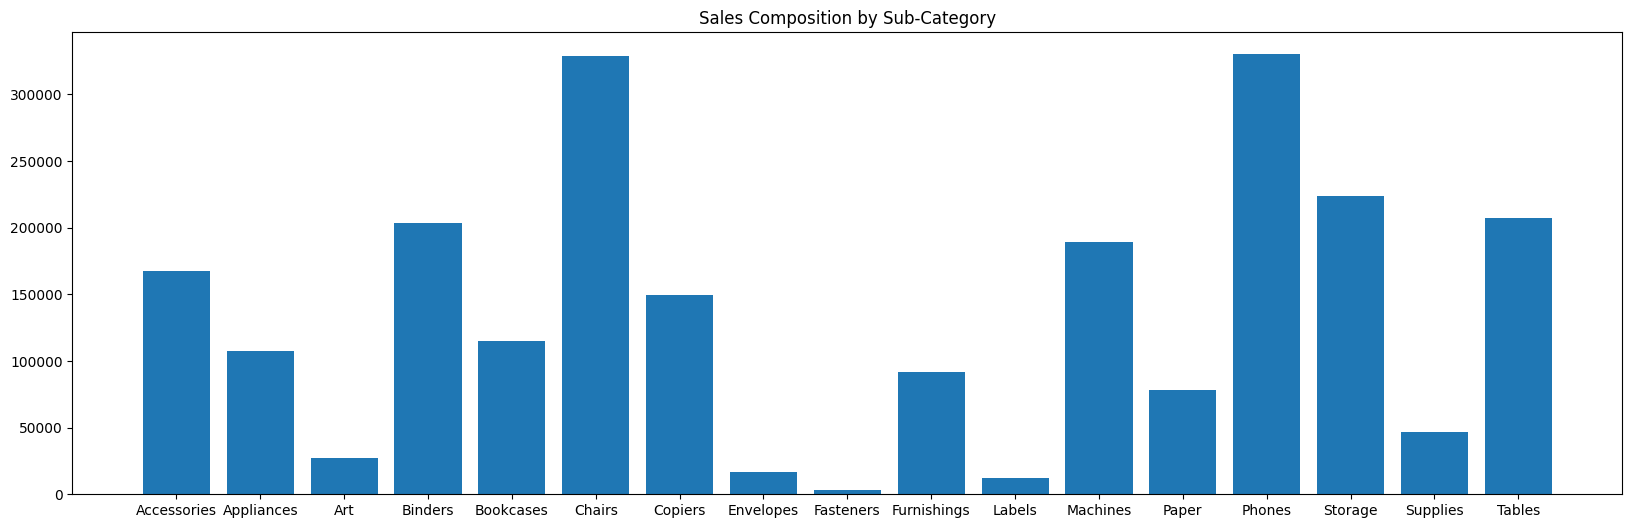

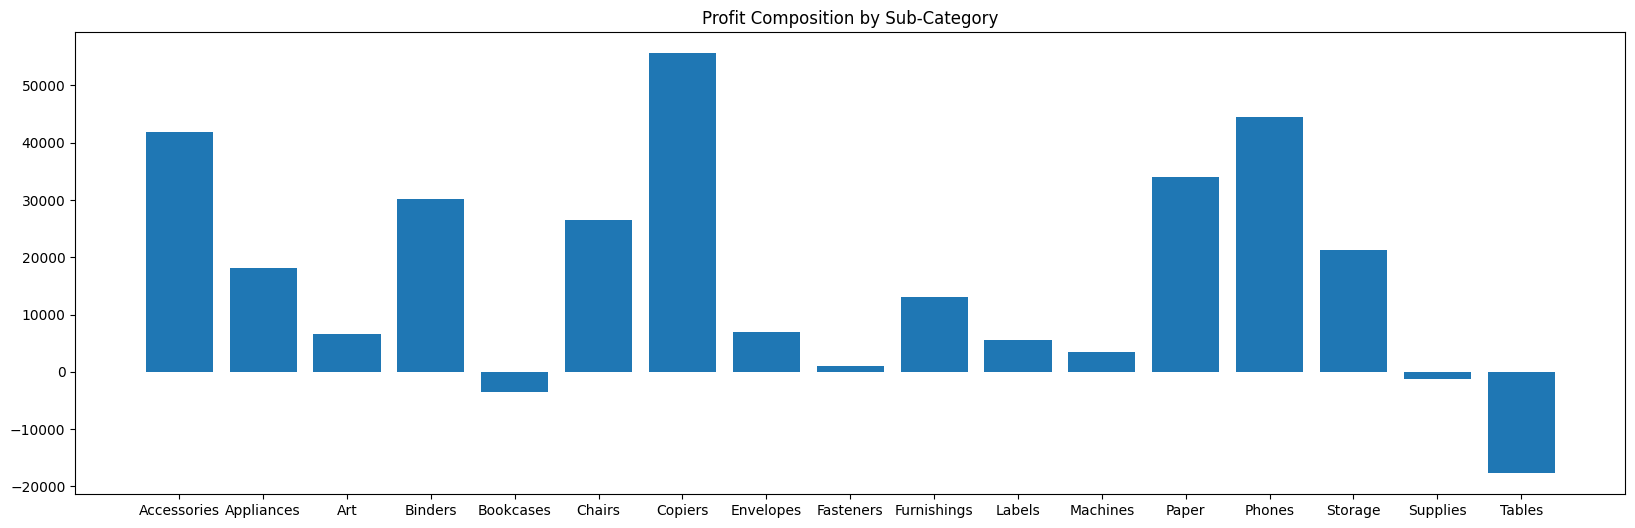

In [ ]:
# Taking a subset of data (To keep things simple)
subcategorical_data = data[['Sub-Category','Sales','Profit','Order Date']]
# taking a groupby on category and then ship mode...
subcategorical_data = subcategorical_data.groupby(['Sub-Category']).sum().reset_index()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'], subcategorical_data['Sales'])
plt.title('Sales Composition by Sub-Category')
plt.show()

# Bar chart by categorical profit
plt.figure(figsize=[20,6])
plt.bar(subcategorical_data['Sub-Category'],subcategorical_data['Profit'])
plt.title('Profit Composition by Sub-Category')
plt.show()

Now that we see what categories and subcategories are most profitable, we must look at the best & worst performing products in each sub-category